In [ ]:
import uncertainties as uc
import uncertainties.unumpy as un
from scipy.optimize import curve_fit
import scipy.constants as c

f_Moseley = lambda Z, s, Er: sqrt(Er)*(Z-s)*sqrt(1/n1**2 - 1/n2**2)

Element,Kernladungszahl $Z$,Energie $E_{{\alpha}} \ [keV]$,Peakbreite $\Delta E_{{\alpha}} \ [keV]$,$\sqrt{{E_{{\alpha}}}} \ \left[ \sqrt{{keV}} \right]$
Mo,$42$,$17.48$,$0.23$,$4.181 \pm 0.028$
Fe,$26$,$6.4$,$0.24$,$2.53 \pm 0.05$
Cu,$29$,$8.02$,$0.23$,$2.83 \pm 0.04$
Zr,$40$,$15.8$,$0.23$,$3.975 \pm 0.029$
Zn,$30$,$8.63$,$0.22$,$2.94 \pm 0.04$
Ni,$28$,$7.46$,$0.22$,$2.73 \pm 0.04$
Ti,$22$,$4.47$,$0.27$,$2.11 \pm 0.06$
Ag,$47$,$21.95$,$0.23$,$4.685 \pm 0.025$


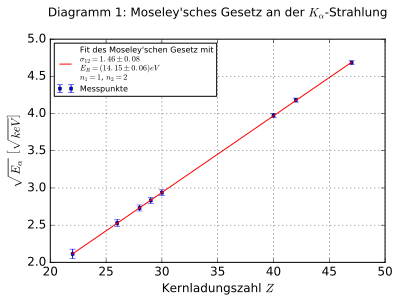

In [45]:
n1 = 1
n2 = 2

ID = loadtxt("256\\Ka.txt", skiprows=1, dtype=bytes, usecols=[0], unpack=True)
Z, Ea_, dEa = loadtxt("256\\Ka.txt", skiprows=1, usecols=(1,2,3), unpack=True)
ID = [i.decode("utf-8") for i in ID]
elements = dict(zip(ID,Z))

Ea = un.uarray(Ea_,dEa)
sEa = un.sqrt(Ea)

table_a = ["<h3>Tabelle 1: Energie der $K_{{\\alpha}}$-Linien</h3>",
           "<tr><th>Element</th><th>Kernladungszahl $Z$</th><th>Energie $E_{{\\alpha}} \ [keV]$</th>"+
           "<th>Peakbreite $\Delta E_{{\\alpha}} \ [keV]$</th><th>$\sqrt{{E_{{\\alpha}}}} \ \\left[ \sqrt{{keV}} \\right]$</th></tr>"]
for i in range(len(ID)):
    table_a.append("<tr><th>{0}</th><td>${1:.0f}$</td><td>${2}$</td><td>${3}$</td><td>${4:L}$</td></tr>".format(ID[i],Z[i],
                                                                                                  Ea_[i],dEa[i],sEa[i]))
display(HTML('<table>{}</table>'.format("".join(table_a))))

popt, pcov = curve_fit(f_Moseley, Z, un.nominal_values(sEa), sigma=un.std_devs(sEa))
popt = un.uarray(popt, sqrt(diagonal(pcov)))

x_ = linspace(Z.min(), Z.max(), 1000)

figure()
errorbar(Z, un.nominal_values(sEa), yerr=un.std_devs(sEa), fmt='bs', label="Messpunkte")
plot(x_, f_Moseley(x_, *un.nominal_values(popt)), color='red',
     label="Fit des Moseley'schen Gesetz mit\n$\sigma_{{12}}={0:L}$\n$E_R=({1:L})eV$\n$n_1=1$, $n_2=2$".format(popt[0],popt[1]*c.kilo))
xlabel(r"Kernladungszahl $Z$")
ylabel(r"$\sqrt{{E_{{\alpha}}}} \ \left[ \sqrt{{keV}} \right]$")
title(r"Diagramm 1: Moseley'sches Gesetz an der $K_{{\alpha}}$-Strahlung", y=1.08, fontsize=12)
grid()
legend(loc=2, fontsize=8)
show()

Element,Kernladungszahl $Z$,Energie $E_{{\beta}} \ [keV]$,Peakbreite $\Delta E_{{\beta}} \ [keV]$,$\sqrt{{E_{{\beta}}}} \ \left[ \sqrt{{keV}} \right]$
Mo,$42$,$19.6$,$0.26$,$4.427 \pm 0.029$
Fe,$26$,$nan$,$nan$,$\mathrm{nan} \pm \mathrm{nan}$
Cu,$29$,$8.84$,$0.27$,$2.97 \pm 0.05$
Zr,$40$,$17.71$,$0.24$,$4.208 \pm 0.029$
Zn,$30$,$9.56$,$0.25$,$3.09 \pm 0.04$
Ni,$28$,$8.18$,$0.27$,$2.86 \pm 0.05$
Ti,$22$,$nan$,$nan$,$\mathrm{nan} \pm \mathrm{nan}$
Ag,$47$,$24.69$,$0.25$,$4.969 \pm 0.025$


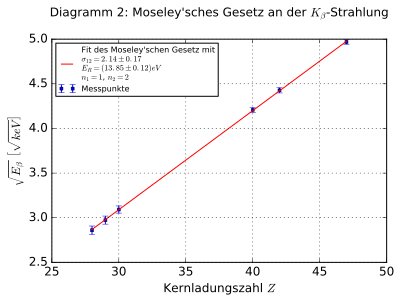

In [44]:
n1 = 1
n2 = 3

ID = loadtxt("256\\Kb.txt", skiprows=1, dtype=bytes, usecols=[0], unpack=True)
Z, Eb_, dEb = loadtxt("256\\Kb.txt", skiprows=1, usecols=(1,2,3), unpack=True)
ID = [i.decode("utf-8") for i in ID]
elements = dict(zip(ID,Z))

Eb = un.uarray(Eb_,dEb)
sEb = un.sqrt(Eb)

table_b = ["<h3>Tabelle 2: Energie der $K_{{\\beta}}$-Linien</h3>",
           "<tr><th>Element</th><th>Kernladungszahl $Z$</th><th>Energie $E_{{\\beta}} \ [keV]$</th>"+
           "<th>Peakbreite $\Delta E_{{\\beta}} \ [keV]$</th><th>$\sqrt{{E_{{\\beta}}}} \ \\left[ \sqrt{{keV}} \\right]$</th></tr>"]
for i in range(len(ID)):
    table_b.append("<tr><th>{0}</th><td>${1:.0f}$</td><td>${2}$</td><td>${3}$</td><td>${4:L}$</td></tr>".format(ID[i],Z[i],
                                                                                                  Eb_[i],dEb[i],sEb[i]))
display(HTML('<table>{}</table>'.format("".join(table_b))))

Z = Z[~isnan(Eb_)]
Eb = Eb[~isnan(Eb_)]
sEb = sEb[~isnan(Eb_)]

popt, pcov = curve_fit(f_Moseley, Z, un.nominal_values(sEb), sigma=un.std_devs(sEb))
popt = un.uarray(popt, sqrt(diagonal(pcov)))

x_ = linspace(Z.min(), Z.max(), 1000)

figure()
errorbar(Z, un.nominal_values(sEb), yerr=un.std_devs(sEb), fmt='bs', label="Messpunkte")
plot(x_, f_Moseley(x_, *un.nominal_values(popt)), color='red',
     label="Fit des Moseley'schen Gesetz mit\n$\sigma_{{12}}={0:L}$\n$E_R=({1:L})eV$\n$n_1=1$, $n_2=2$".format(popt[0],popt[1]*c.kilo))
xlabel(r"Kernladungszahl $Z$")
ylabel(r"$\sqrt{{E_{{\beta}}}} \ \left[ \sqrt{{keV}} \right]$")
title(r"Diagramm 2: Moseley'sches Gesetz an der $K_{{\beta}}$-Strahlung", y=1.08, fontsize=12)
grid()
legend(loc=2, fontsize=8)
show()